In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
reason_data=pd.read_csv('/content/reason18315ff.csv')

In [3]:
call_data=pd.read_csv('/content/callsf0d4f5a.csv')

In [4]:
customer_data=pd.read_csv('/content/customers2afd6ea.csv')

In [5]:
sentiment_data=pd.read_csv("/content/sentiment_statisticscc1e57a.csv")

In [6]:
# prompt: merge all csv files

import pandas as pd
merged_df = pd.merge(reason_data, call_data, on='call_id', how='outer')
merged_df = pd.merge(merged_df, customer_data, on='customer_id', how='outer')
merged_df = pd.merge(merged_df, sentiment_data, on='call_id', how='outer')

df=merged_df

In [7]:
if 'agent_id_x' in df.columns and 'agent_id_y' in df.columns:
  if (df['agent_id_x'] == df['agent_id_y']).all():
    df = df.rename(columns={'agent_id_x': 'agent_id'})
    df = df.drop('agent_id_y', axis=1)
  else:
    print("Agent ID columns are not identical.")
elif 'agent_id_x' in df.columns:
    df = df.rename(columns={'agent_id_x': 'agent_id'})
elif 'agent_id_y' in df.columns:
    df = df.rename(columns={'agent_id_y': 'agent_id'})
else:
    print("No agent_id_x or agent_id_y columns found")

df.head()

,call_id,primary_call_reason,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,131642,Seating,103262588,132311,8/4/2024 17:46,8/4/2024 17:55,8/4/2024 17:59,\n\nAgent: Thank you for calling United Airlin...,Michael Petersen,0.0,neutral,polite,-0.07,0.03
1,325527,IRROPS,8994245383,607742,8/18/2024 7:41,8/18/2024 7:45,8/18/2024 7:50,\n\nAgent: Thank you for calling United Airlin...,Andrew Hess,NaN,neutral,angry,-0.19,0.05
2,526871,Voluntary Change,5769982111,748700,8/10/2024 11:59,8/10/2024 12:08,8/10/2024 12:15,\n\nAgent: Thank you for calling United Airlin...,Joseph Thomas,3.0,neutral,frustrated,-0.22,0.13
3,634548,Seating,9534089270,542034,8/11/2024 11:15,8/11/2024 11:25,8/11/2024 11:39,\n\nAgent: Thank you for calling United Airlin...,Victoria Green,0.0,neutral,polite,-0.11,0.24
4,693921,Voluntary Change,3046806067,633922,8/6/2024 15:58,8/6/2024 16:09,8/6/2024 16:15,\n\nAgent: Thank you for calling United Airlin...,Vickie Lopez,1.0,neutral,frustrated,-0.02,0.14


In [8]:
df.shape

(71810, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   primary_call_reason      66653 non-null  object 
 2   customer_id              71810 non-null  int64  
 3   agent_id                 71810 non-null  int64  
 4   call_start_datetime      71810 non-null  object 
 5   agent_assigned_datetime  71810 non-null  object 
 6   call_end_datetime        71810 non-null  object 
 7   call_transcript          71810 non-null  object 
 8   customer_name            71810 non-null  object 
 9   elite_level_code         46043 non-null  float64
 10  agent_tone               71593 non-null  object 
 11  customer_tone            71810 non-null  object 
 12  average_sentiment        71701 non-null  float64
 13  silence_percent_average  71810 non-null  float64
dtypes: float64(3), int64(3

In [10]:
df.describe()

,call_id,customer_id,agent_id,elite_level_code,average_sentiment,silence_percent_average
count,7.181000e+04,7.181000e+04,71810.000000,46043.000000,71701.000000,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039,1.370871,-0.033519,0.285515
std,2.889673e+09,2.884255e+09,257532.362167,1.322297,0.143715,0.192031
min,1.316420e+05,1.197800e+04,102574.000000,0.000000,-1.380000,0.000000
25%,2.480013e+09,2.514618e+09,347606.000000,0.000000,-0.110000,0.130000
50%,4.989448e+09,4.999664e+09,591778.000000,1.000000,-0.020000,0.260000
75%,7.493629e+09,7.509126e+09,786323.000000,2.000000,0.050000,0.410000
max,9.999806e+09,9.999935e+09,993862.000000,5.000000,2.670000,0.980000


In [11]:

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")


Number of numerical columns: 6
Number of categorical columns: 8


In [12]:
distinct_agent_ids = df['agent_id'].unique()
distinct_customer_ids = df['customer_id'].unique()
distinct_call_ids = df['call_id'].unique()

print(f"Number of distinct agent IDs: {len(distinct_agent_ids)}")
print(f"Number of distinct customer IDs: {len(distinct_customer_ids)}")
print(f"Number of distinct call IDs: {len(distinct_call_ids)}")


Number of distinct agent IDs: 383
Number of distinct customer IDs: 71810
Number of distinct call IDs: 71810


In [13]:
df['primary_call_reason'] = df['primary_call_reason'].str.replace(' ', '', regex=True).str.replace('-', '', regex=True).str.lower()

In [14]:
# prompt: count of distinct primary call reasons

distinct_primary_reasons = df['primary_call_reason'].nunique()
print(f"Number of distinct primary call reasons: {distinct_primary_reasons}")


Number of distinct primary call reasons: 21


In [15]:
top_10_reasons = df['primary_call_reason'].value_counts().head(10)
print(top_10_reasons)


primary_call_reason
irrops                 13311
voluntarychange        10848
seating                 6365
mileageplus             5851
postflight              4330
communications          3840
productsandservices     2856
baggage                 2832
upgrade                 2738
booking                 2637
Name: count, dtype: int64


In [16]:
df['primary_call_reason'].value_counts().head(10)

,count
primary_call_reason,
irrops,13311
voluntarychange,10848
seating,6365
mileageplus,5851
postflight,4330
communications,3840
productsandservices,2856
baggage,2832
upgrade,2738


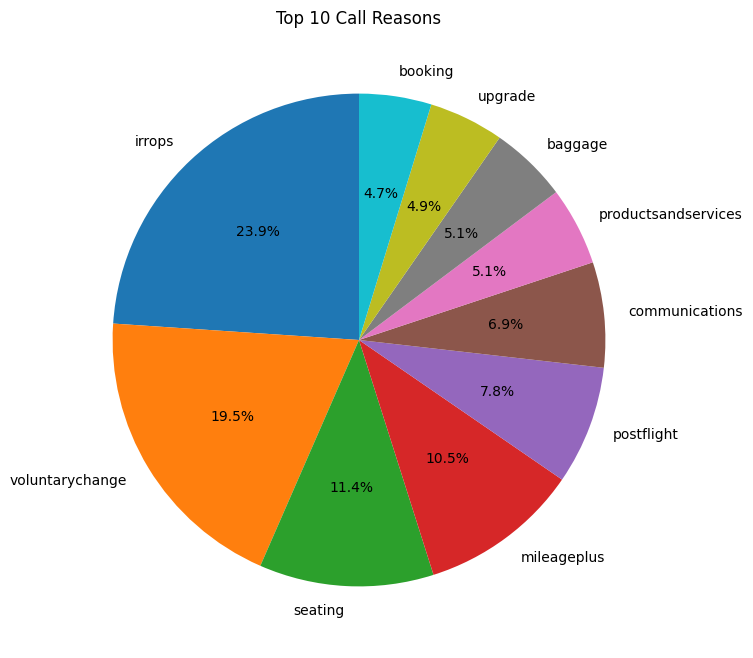

In [17]:
# prompt: CREATE A PIE CHART OF TOP 10 CALL REASONS

import matplotlib.pyplot as plt
top_10_reasons = df['primary_call_reason'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_reasons, labels=top_10_reasons.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Call Reasons')
plt.show()


In [ ]:
df['elite_level_code']

,elite_level_code
0,0.0
1,NaN
2,3.0
3,0.0
4,1.0
...,...
71805,NaN
71806,1.0
71807,NaN
71808,3.0


In [ ]:
print("Null Values")
print(df.isnull().sum())

Null Values
call_id                        0
primary_call_reason         5157
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
customer_name                  0
elite_level_code           25767
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
dtype: int64


In [ ]:
# prompt: drop null from primary call reason , agent tone , average sentiment

df.dropna(subset=['primary_call_reason', 'agent_tone', 'average_sentiment'], inplace=True)


In [ ]:
df.shape

(66455, 14)

In [ ]:
df.head()

,call_id,primary_call_reason,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,131642,seating,103262588,132311,8/4/2024 17:46,8/4/2024 17:55,8/4/2024 17:59,\n\nAgent: Thank you for calling United Airlin...,Michael Petersen,0.0,neutral,polite,-0.07,0.03
1,325527,irrops,8994245383,607742,8/18/2024 7:41,8/18/2024 7:45,8/18/2024 7:50,\n\nAgent: Thank you for calling United Airlin...,Andrew Hess,NaN,neutral,angry,-0.19,0.05
2,526871,voluntarychange,5769982111,748700,8/10/2024 11:59,8/10/2024 12:08,8/10/2024 12:15,\n\nAgent: Thank you for calling United Airlin...,Joseph Thomas,3.0,neutral,frustrated,-0.22,0.13
3,634548,seating,9534089270,542034,8/11/2024 11:15,8/11/2024 11:25,8/11/2024 11:39,\n\nAgent: Thank you for calling United Airlin...,Victoria Green,0.0,neutral,polite,-0.11,0.24
4,693921,voluntarychange,3046806067,633922,8/6/2024 15:58,8/6/2024 16:09,8/6/2024 16:15,\n\nAgent: Thank you for calling United Airlin...,Vickie Lopez,1.0,neutral,frustrated,-0.02,0.14


In [ ]:
print("Null Values")
print(df.isnull().sum())

Null Values
call_id                        0
primary_call_reason            0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
customer_name                  0
elite_level_code           23876
agent_tone                     0
customer_tone                  0
average_sentiment              0
silence_percent_average        0
dtype: int64


In [ ]:
df.shape

(66455, 14)

In [18]:
# prompt: calculate call duration from call start datetime and call end datetime

import pandas as pd

# Assuming your DataFrame has columns named 'call_start_datetime' and 'call_end_datetime'
# Convert these columns to datetime objects if they are not already.
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])
df['agent_assigned_datetime']=pd.to_datetime(df['agent_assigned_datetime'])

# Calculate the call duration
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds()

# You can also express the duration in minutes or hours if needed
df['call_duration'] = df['call_duration'] / 60
# df['call_duration_hours'] = df['call_duration'] / 3600

df.head()


,call_id,primary_call_reason,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_duration
0,131642,seating,103262588,132311,2024-08-04 17:46:00,2024-08-04 17:55:00,2024-08-04 17:59:00,\n\nAgent: Thank you for calling United Airlin...,Michael Petersen,0.0,neutral,polite,-0.07,0.03,13.0
1,325527,irrops,8994245383,607742,2024-08-18 07:41:00,2024-08-18 07:45:00,2024-08-18 07:50:00,\n\nAgent: Thank you for calling United Airlin...,Andrew Hess,NaN,neutral,angry,-0.19,0.05,9.0
2,526871,voluntarychange,5769982111,748700,2024-08-10 11:59:00,2024-08-10 12:08:00,2024-08-10 12:15:00,\n\nAgent: Thank you for calling United Airlin...,Joseph Thomas,3.0,neutral,frustrated,-0.22,0.13,16.0
3,634548,seating,9534089270,542034,2024-08-11 11:15:00,2024-08-11 11:25:00,2024-08-11 11:39:00,\n\nAgent: Thank you for calling United Airlin...,Victoria Green,0.0,neutral,polite,-0.11,0.24,24.0
4,693921,voluntarychange,3046806067,633922,2024-08-06 15:58:00,2024-08-06 16:09:00,2024-08-06 16:15:00,\n\nAgent: Thank you for calling United Airlin...,Vickie Lopez,1.0,neutral,frustrated,-0.02,0.14,17.0


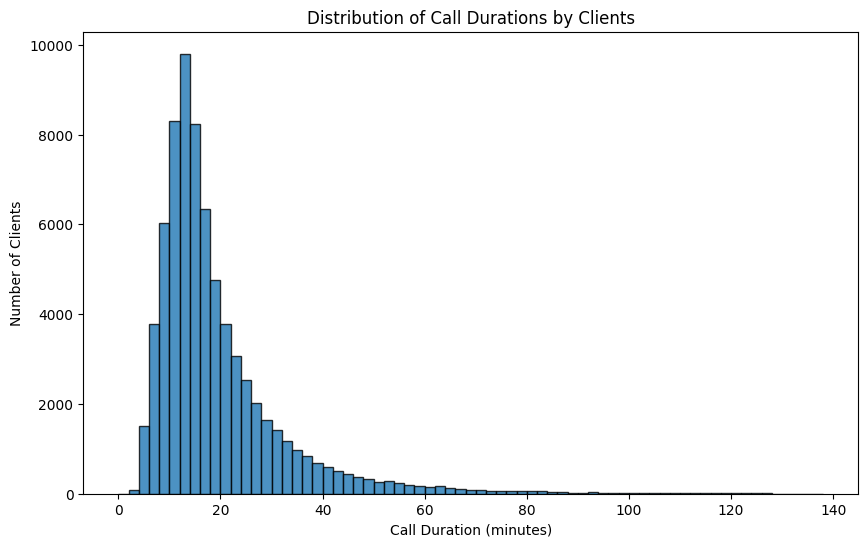

In [19]:
bins = range(0, int(df['call_duration'].max()) + 10, 2)

# Plot the histogram of call durations
plt.figure(figsize=(10, 6))
plt.hist(df['call_duration'], bins=bins, edgecolor='black', alpha=0.8)

# Add labels and title
plt.xlabel('Call Duration (minutes)')
plt.ylabel('Number of Clients')
plt.title('Distribution of Call Durations by Clients')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


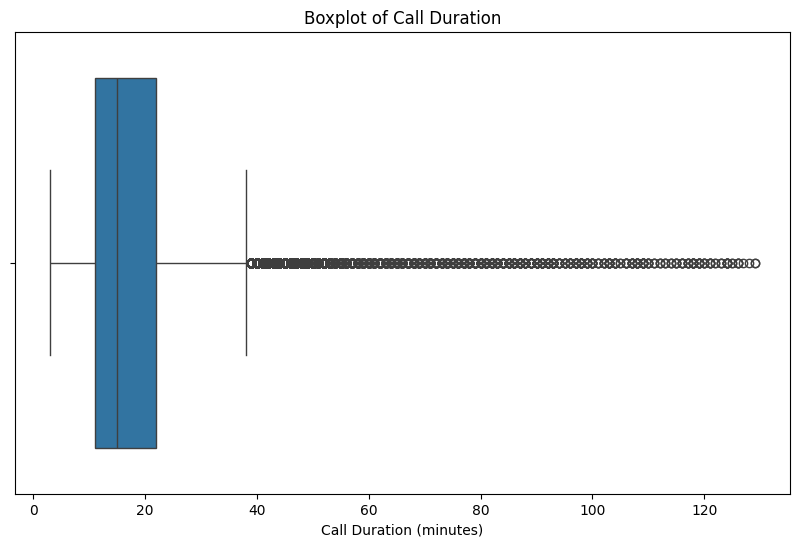

In [21]:
# prompt: boxplot for call_duration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame with the 'call_duration' column

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['call_duration'])
plt.title('Boxplot of Call Duration')
plt.xlabel('Call Duration (minutes)')
plt.show()


In [22]:
# prompt: remove the outliers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df' is your DataFrame with the 'call_duration' column
# and you want to remove outliers based on the 'call_duration'

# Calculate the IQR
Q1 = df['call_duration'].quantile(0.25)
Q3 = df['call_duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df= df[(df['call_duration'] >= lower_bound) & (df['call_duration'] <= upper_bound)]

# You can also remove outliers based on z-score or other methods

# Print the shape of the original and outlier-removed DataFrames
print(f"DataFrame shape after removing outliers: {df.shape}")

# You can then continue your analysis using df_no_outliers


DataFrame shape after removing outliers: (66636, 15)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


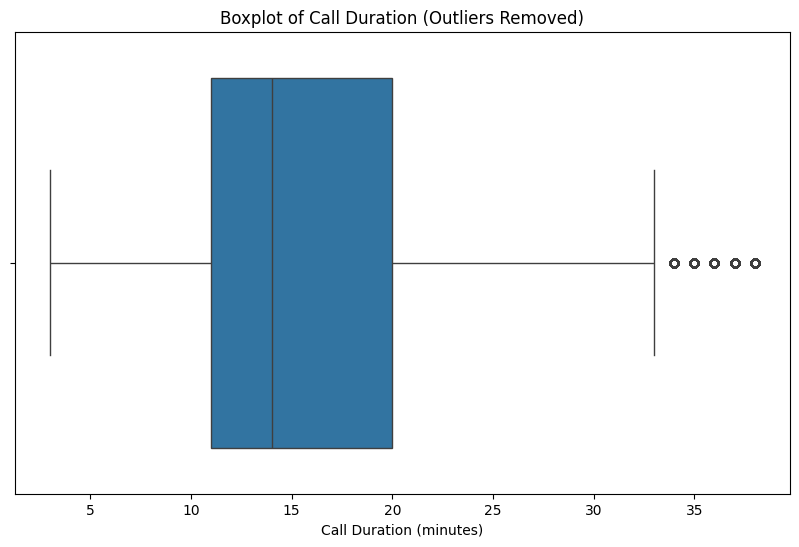

In [23]:
# prompt: show the boxplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'df_no_outliers' is your DataFrame with the 'call_duration' column without outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['call_duration'])
plt.title('Boxplot of Call Duration (Outliers Removed)')
plt.xlabel('Call Duration (minutes)')
plt.show()


In [ ]:
!pip install nltk

In [24]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Download stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean the transcripts
def preprocess_transcript(text):
    # Remove special characters, numbers, and lower the text
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())

    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply the preprocessing function to the 'transcript' column
df['cleaned_transcript'] = df['call_transcript'].apply(preprocess_transcript)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
def clean_transcript(text):
    text = text.replace('agent', '').replace('customer', '')
    return text.strip()

# Apply the function to the 'transcript' column
df['cleaned_transcript'] = df['cleaned_transcript'].apply(clean_transcript)

# Display the cleaned transcripts
df[['call_transcript','cleaned_transcript']].head()

,call_transcript,cleaned_transcript
0,\n\nAgent: Thank you for calling United Airlin...,thank calling united airlines name jane may he...
1,\n\nAgent: Thank you for calling United Airlin...,thank calling united airlines name mark may he...
2,\n\nAgent: Thank you for calling United Airlin...,thank calling united airlines name steven may ...
3,\n\nAgent: Thank you for calling United Airlin...,thank calling united airlines name amy may hel...
4,\n\nAgent: Thank you for calling United Airlin...,thank calling united airlines service john sp...


In [ ]:
df.shape

(61635, 15)

In [26]:
df['Handling_Time'] = (df["call_end_datetime"]-df['agent_assigned_datetime']).dt.total_seconds() / 60

In [27]:
df['Speed_To_Answer']=(df['agent_assigned_datetime']-df['call_start_datetime']).dt.total_seconds() / 60

In [ ]:
# prompt: reset index

df = df.reset_index(drop=True)


In [28]:
df.head()

,call_id,primary_call_reason,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_duration,cleaned_transcript,Handling_Time,Speed_To_Answer
0,131642,seating,103262588,132311,2024-08-04 17:46:00,2024-08-04 17:55:00,2024-08-04 17:59:00,\n\nAgent: Thank you for calling United Airlin...,Michael Petersen,0.0,neutral,polite,-0.07,0.03,13.0,thank calling united airlines name jane may he...,4.0,9.0
1,325527,irrops,8994245383,607742,2024-08-18 07:41:00,2024-08-18 07:45:00,2024-08-18 07:50:00,\n\nAgent: Thank you for calling United Airlin...,Andrew Hess,NaN,neutral,angry,-0.19,0.05,9.0,thank calling united airlines name mark may he...,5.0,4.0
2,526871,voluntarychange,5769982111,748700,2024-08-10 11:59:00,2024-08-10 12:08:00,2024-08-10 12:15:00,\n\nAgent: Thank you for calling United Airlin...,Joseph Thomas,3.0,neutral,frustrated,-0.22,0.13,16.0,thank calling united airlines name steven may ...,7.0,9.0
3,634548,seating,9534089270,542034,2024-08-11 11:15:00,2024-08-11 11:25:00,2024-08-11 11:39:00,\n\nAgent: Thank you for calling United Airlin...,Victoria Green,0.0,neutral,polite,-0.11,0.24,24.0,thank calling united airlines name amy may hel...,14.0,10.0
4,693921,voluntarychange,3046806067,633922,2024-08-06 15:58:00,2024-08-06 16:09:00,2024-08-06 16:15:00,\n\nAgent: Thank you for calling United Airlin...,Vickie Lopez,1.0,neutral,frustrated,-0.02,0.14,17.0,thank calling united airlines service john sp...,6.0,11.0


In [29]:
df[['call_start_datetime','agent_assigned_datetime','Speed_To_Answer']].head()

,call_start_datetime,agent_assigned_datetime,Speed_To_Answer
0,2024-08-04 17:46:00,2024-08-04 17:55:00,9.0
1,2024-08-18 07:41:00,2024-08-18 07:45:00,4.0
2,2024-08-10 11:59:00,2024-08-10 12:08:00,9.0
3,2024-08-11 11:15:00,2024-08-11 11:25:00,10.0
4,2024-08-06 15:58:00,2024-08-06 16:09:00,11.0


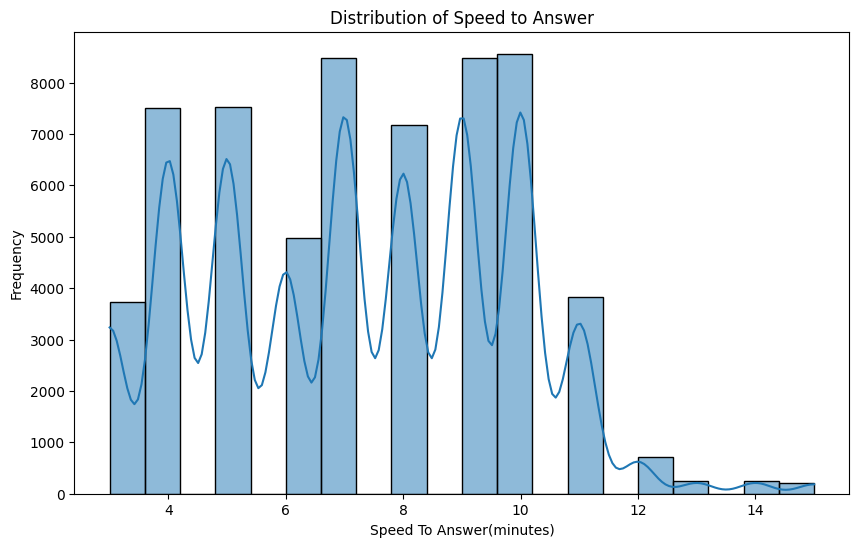

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Speed_To_Answer'], bins=20, kde=True)
plt.title('Distribution of Speed to Answer')
plt.xlabel('Speed To Answer(minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df[['agent_assigned_datetime','call_end_datetime','Handling_Time']].head()

,agent_assigned_datetime,call_end_datetime,Handling_Time
0,2024-08-04 17:55:00,2024-08-04 17:59:00,4.0
1,2024-08-18 07:45:00,2024-08-18 07:50:00,5.0
2,2024-08-10 12:08:00,2024-08-10 12:15:00,7.0
3,2024-08-11 11:25:00,2024-08-11 11:39:00,14.0
4,2024-08-06 16:09:00,2024-08-06 16:15:00,6.0


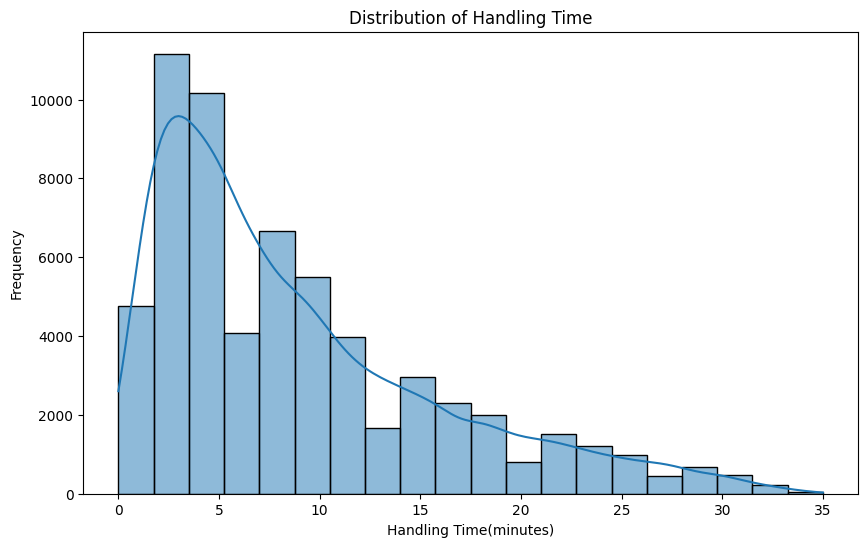

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Handling_Time'], bins=20, kde=True)
plt.title('Distribution of Handling Time')
plt.xlabel('Handling Time(minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Average_Handle_Time = df.groupby('agent_id')['Handling_Time'].mean().reset_index()

In [ ]:
Average_Handle_Time

,agent_id,Handling_Time
0,102574,5.000000
1,103651,9.042802
2,106000,9.107527
3,107876,13.000000
4,112609,9.000000
...,...,...
377,981776,8.498054
378,981779,8.730964
379,982131,9.243478
380,992521,11.131579


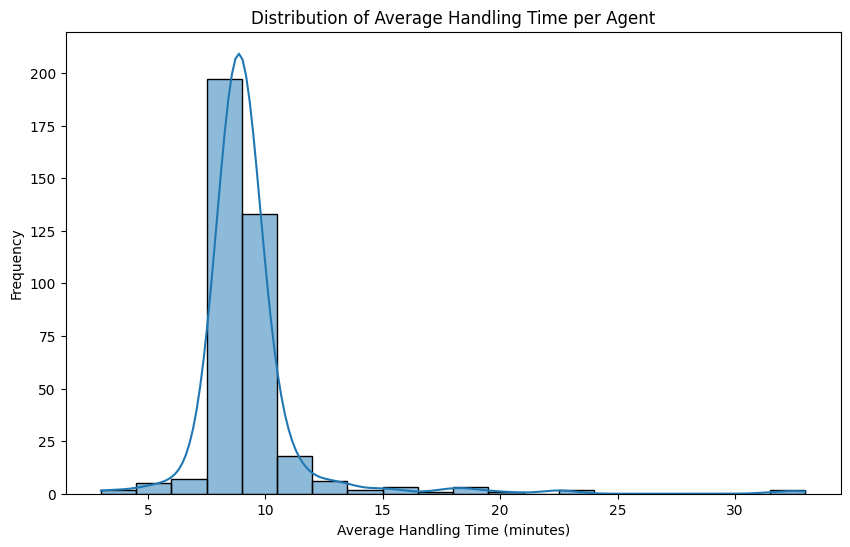

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(Average_Handle_Time['Handling_Time'], bins=20, kde=True)
plt.title('Distribution of Average Handling Time per Agent')
plt.xlabel('Average Handling Time (minutes)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
AST = df.groupby('agent_id')['Speed_To_Answer'].mean().reset_index()

In [ ]:
AST

,agent_id,Speed_To_Answer
0,102574,7.000000
1,103651,6.964981
2,106000,7.354839
3,107876,7.200000
4,112609,7.714286
...,...,...
377,981776,7.077821
378,981779,7.248731
379,982131,7.356522
380,992521,7.368421


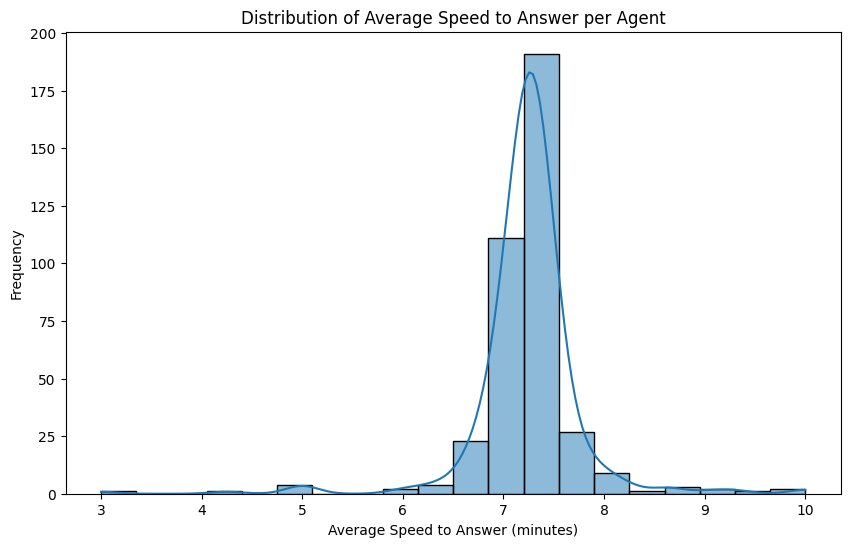

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(AST['Speed_To_Answer'], bins=20, kde=True)
plt.title('Distribution of Average Speed to Answer per Agent')
plt.xlabel('Average Speed to Answer (minutes)')
plt.ylabel('Frequency')
plt.show()


In [30]:
agent_emotion_impact = df.groupby('agent_tone').agg(
    average_aht=('Handling_Time', 'mean'),
    call_count=('call_id', 'count')
).reset_index()

In [31]:
agent_emotion_impact

,agent_tone,average_aht,call_count
0,angry,5.343085,376
1,calm,8.649578,23446
2,frustrated,7.814654,3453
3,neutral,9.117784,39063
4,polite,3.666667,87


<ipython-input-58-d53c475d0daf>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sentiment_per_reason = df.groupby('primary_call_reason')['average_sentiment'].mean().reset_index()
<ipython-input-58-d53c475d0daf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='primary_call_reason', y='average_sentiment', data=average_sentiment_per_reason, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

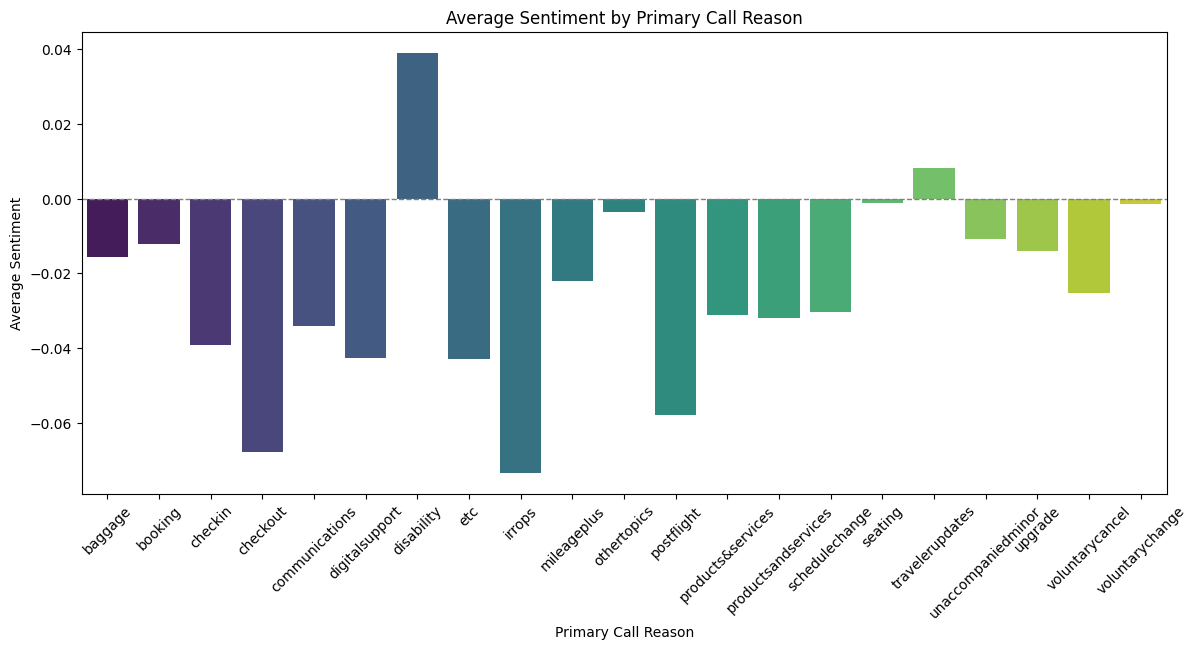

In [ ]:
df['primary_call_reason'] = df['primary_call_reason'].astype('category')
plt.figure(figsize=(14, 6))
average_sentiment_per_reason = df.groupby('primary_call_reason')['average_sentiment'].mean().reset_index()
sns.barplot(x='primary_call_reason', y='average_sentiment', data=average_sentiment_per_reason, palette='viridis')
plt.title("Average Sentiment by Primary Call Reason")
plt.xlabel("Primary Call Reason")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.axhline(0, color='grey', lw=1, ls='--')  # Line for neutral sentiment
plt.show()

In [32]:
# Calculate average call duration for each call reason
avg_duration_per_reason = df.groupby('primary_call_reason')['Handling_Time'].mean().sort_values(ascending=False)

# Calculate total call duration for each call reason
total_duration_per_reason = df.groupby('primary_call_reason')['Handling_Time'].sum().sort_values(ascending=False)

# Display the results
print("Average Call Duration per Reason:\n")
print(avg_duration_per_reason)

print("\nTotal Call Duration per Reason:\n")
print(total_duration_per_reason)

Average Call Duration per Reason:

primary_call_reason
mileageplus            11.686447
checkout               10.970130
communications         10.614972
etc                    10.512407
irrops                 10.128437
productsandservices     9.966692
postflight              9.907905
products&services       9.427293
upgrade                 8.859048
voluntarychange         8.734096
voluntarycancel         8.103448
unaccompaniedminor      7.400000
seating                 6.843213
checkin                 6.571668
schedulechange          6.512091
booking                 6.150329
travelerupdates         5.873638
digitalsupport          5.617940
othertopics             5.517879
baggage                 5.041577
disability              4.536341
Name: Handling_Time, dtype: float64

Total Call Duration per Reason:

primary_call_reason
irrops                 124124.0
voluntarychange         89376.0
mileageplus             59671.0
seating                 42250.0
communications          37577.0
po

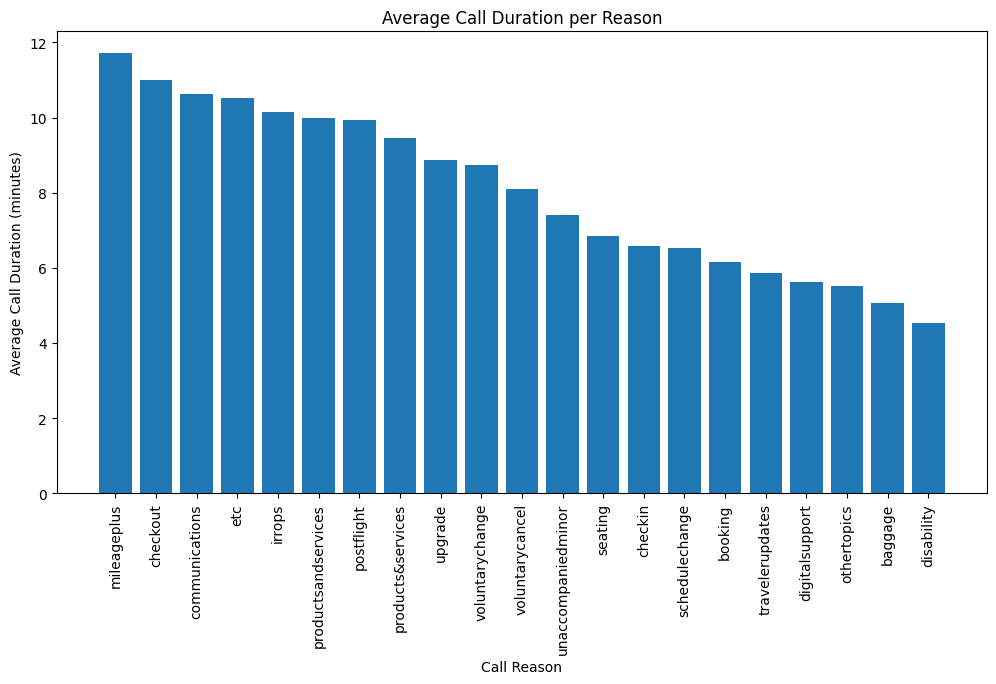

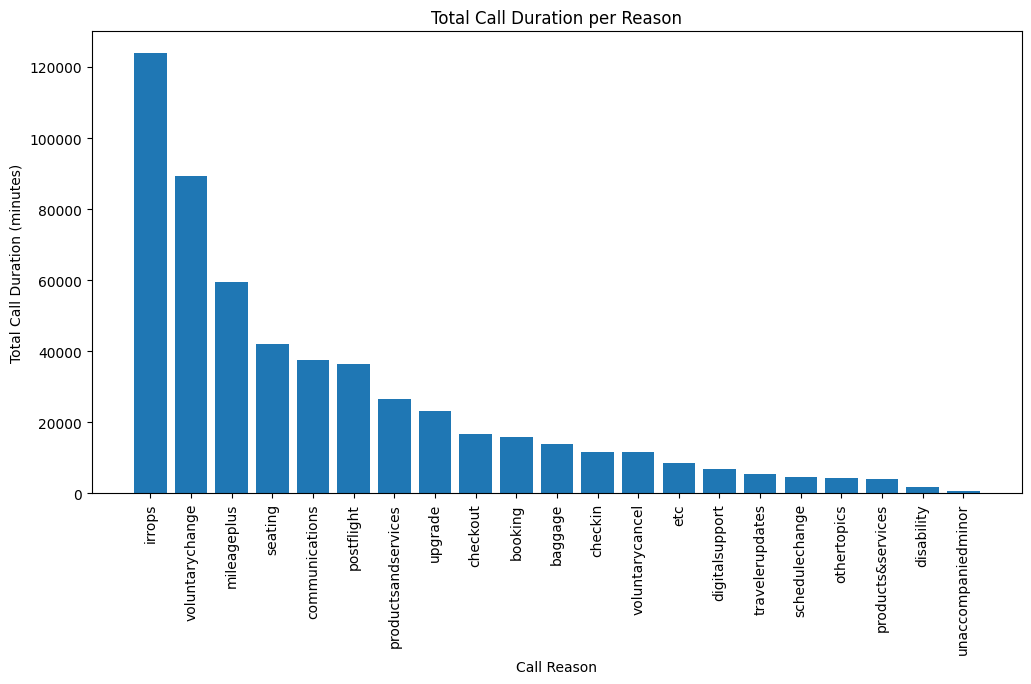

In [ ]:
# prompt: create a  bar plot on average call duration vs reason and total call duration vs reason seperately

import matplotlib.pyplot as plt

# Average Call Duration vs. Reason
plt.figure(figsize=(12, 6))
plt.bar(avg_duration_per_reason.index, avg_duration_per_reason.values)
plt.xlabel('Call Reason')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Reason')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Total Call Duration vs. Reason
plt.figure(figsize=(12, 6))
plt.bar(total_duration_per_reason.index, total_duration_per_reason.values)
plt.xlabel('Call Reason')
plt.ylabel('Total Call Duration (minutes)')
plt.title('Total Call Duration per Reason')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [34]:
df

,call_id,primary_call_reason,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_duration,cleaned_transcript,Handling_Time,Speed_To_Answer
0,131642,seating,103262588,132311,2024-08-04 17:46:00,2024-08-04 17:55:00,2024-08-04 17:59:00,\n\nAgent: Thank you for calling United Airlin...,Michael Petersen,0.0,neutral,polite,-0.07,0.03,13.0,thank calling united airlines name jane may he...,4.0,9.0
1,325527,irrops,8994245383,607742,2024-08-18 07:41:00,2024-08-18 07:45:00,2024-08-18 07:50:00,\n\nAgent: Thank you for calling United Airlin...,Andrew Hess,NaN,neutral,angry,-0.19,0.05,9.0,thank calling united airlines name mark may he...,5.0,4.0
2,526871,voluntarychange,5769982111,748700,2024-08-10 11:59:00,2024-08-10 12:08:00,2024-08-10 12:15:00,\n\nAgent: Thank you for calling United Airlin...,Joseph Thomas,3.0,neutral,frustrated,-0.22,0.13,16.0,thank calling united airlines name steven may ...,7.0,9.0
3,634548,seating,9534089270,542034,2024-08-11 11:15:00,2024-08-11 11:25:00,2024-08-11 11:39:00,\n\nAgent: Thank you for calling United Airlin...,Victoria Green,0.0,neutral,polite,-0.11,0.24,24.0,thank calling united airlines name amy may hel...,14.0,10.0
4,693921,voluntarychange,3046806067,633922,2024-08-06 15:58:00,2024-08-06 16:09:00,2024-08-06 16:15:00,\n\nAgent: Thank you for calling United Airlin...,Vickie Lopez,1.0,neutral,frustrated,-0.02,0.14,17.0,thank calling united airlines service john sp...,6.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71804,9999336076,travelerupdates,3020619605,309976,2024-08-19 21:04:00,2024-08-19 21:16:00,2024-08-19 21:26:00,\n\nAgent: Thank you for calling United Airlin...,Jared Schultz,1.0,calm,calm,0.03,0.49,22.0,thank calling united airlines steve help hi s...,10.0,12.0
71805,9999337789,NaN,915905859,418648,2024-08-21 23:08:00,2024-08-21 23:17:00,2024-08-21 23:24:00,\n\nAgent: Thank you for calling United Airlin...,Jose Black,NaN,neutral,neutral,-0.05,0.15,16.0,thank calling united airlines service name ry...,7.0,9.0
71806,9999524523,irrops,3888680689,901589,2024-08-20 17:30:00,2024-08-20 17:36:00,2024-08-20 17:39:00,\n\nAgent: Thank you for calling United Airlin...,Angela Johnson,1.0,neutral,calm,-0.05,0.21,9.0,thank calling united airlines service name al...,3.0,6.0
71807,9999623753,irrops,4101455140,835105,2024-08-03 14:07:00,2024-08-03 14:11:00,2024-08-03 14:28:00,\n\nAgent: Thank you for calling United Airlin...,Michael Reed,NaN,neutral,neutral,-0.17,0.40,21.0,thank calling united airlines name rob may hel...,17.0,4.0


In [35]:
sentiment_impact = df.groupby('customer_tone').agg(
    average_aht=('Handling_Time', 'mean'),
    average_ast=('Speed_To_Answer', 'mean'),
    sentiment_score=('average_sentiment', 'mean'),
    silence_avg=('silence_percent_average', 'mean')
).reset_index()


print(sentiment_impact)

  customer_tone  average_aht  average_ast  sentiment_score  silence_avg
0         angry     8.890308     7.247984        -0.029759     0.274280
1          calm     8.821689     7.271640        -0.030387     0.271130
2    frustrated     8.809124     7.260024        -0.032387     0.270241
3       neutral     8.948996     7.277052        -0.031245     0.276181
4        polite     8.736392     7.256935        -0.032296     0.270729


In [37]:

agent_emotion_impact = df.groupby('agent_tone').agg(
    average_aht=('Handling_Time', 'mean'),
    call_count=('call_id', 'count')
).reset_index()

# Display the result
agent_emotion_impact


,agent_tone,average_aht,call_count
0,angry,5.343085,376
1,calm,8.649578,23446
2,frustrated,7.814654,3453
3,neutral,9.117784,39063
4,polite,3.666667,87


In [ ]:
correlation_matrix = df[['Handling_Time', 'Speed_To_Answer', 'average_sentiment', 'silence_percent_average']].corr()

In [38]:
correlation_matrix = df[['Handling_Time', 'Speed_To_Answer', 'average_sentiment', 'silence_percent_average']].corr()

# Displaying the correlation matrix
correlation_matrix

,Handling_Time,Speed_To_Answer,average_sentiment,silence_percent_average
Handling_Time,1.000000,-0.070729,-0.052514,0.421462
Speed_To_Answer,-0.070729,1.000000,0.044966,-0.023978
average_sentiment,-0.052514,0.044966,1.000000,0.049830
silence_percent_average,0.421462,-0.023978,0.049830,1.000000


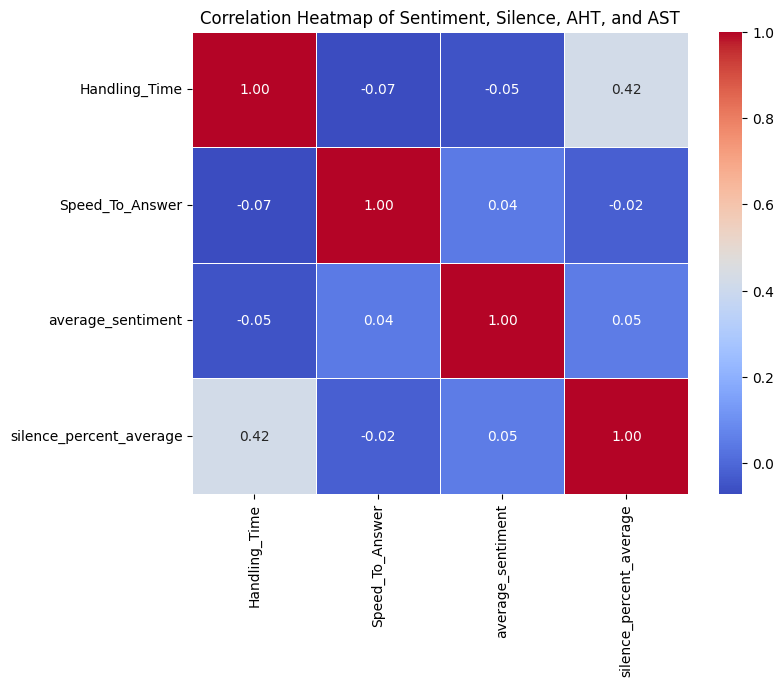

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap of Sentiment, Silence, AHT, and AST')
plt.show()

In [42]:
agent_emotion_impact = df.groupby('agent_tone').agg(
    average_aht=('Handling_Time', 'mean'),
    average_ast=('Speed_To_Answer', 'mean'),
    sentiment_score=('average_sentiment', 'mean'),
    silence_avg=('silence_percent_average', 'mean')
).reset_index()


# Display the result
agent_emotion_impact


,agent_tone,average_aht,average_ast,sentiment_score,silence_avg
0,angry,5.343085,7.050532,-0.616915,0.183723
1,calm,8.649578,7.380491,0.103344,0.281470
2,frustrated,7.814654,7.022879,-0.330802,0.238430
3,neutral,9.117784,7.213629,-0.079731,0.271331
4,polite,3.666667,7.689655,0.673793,0.256552


In [63]:
sentiment_counts = sentiment_data.groupby(['agent_id', 'agent_tone']).size().unstack(fill_value=0)

avg_sentiment_per_agent = sentiment_data.groupby('agent_id')['average_sentiment'].mean()


agent_sentiment_analysis = pd.merge(sentiment_counts, avg_sentiment_per_agent, on='agent_id')
agent_sentiment_analysis


,angry,calm,frustrated,neutral,polite,average_sentiment
agent_id,,,,,,
102574,0,1,0,1,0,-0.075000
103651,3,102,13,180,0,-0.027953
106000,0,36,3,74,0,-0.032124
107876,0,1,0,5,0,-0.065000
112609,0,5,0,6,0,-0.020909
...,...,...,...,...,...,...
981776,1,109,20,178,1,-0.026861
981779,1,68,12,145,1,-0.034714
982131,2,84,15,168,0,-0.038815


from matplotlib import pyplot as plt
agent_sentiment_analysis['angry'].plot(kind='hist', bins=20, title='angry')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis['calm'].plot(kind='hist', bins=20, title='calm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis['frustrated'].plot(kind='hist', bins=20, title='frustrated')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis['neutral'].plot(kind='hist', bins=20, title='neutral')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis.plot(kind='scatter', x='angry', y='calm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis.plot(kind='scatter', x='calm', y='frustrated', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis.plot(kind='scatter', x='frustrated', y='neutral', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis.plot(kind='scatter', x='neutral', y='polite', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis['angry'].plot(kind='line', figsize=(8, 4), title='angry')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis['calm'].plot(kind='line', figsize=(8, 4), title='calm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis['frustrated'].plot(kind='line', figsize=(8, 4), title='frustrated')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
agent_sentiment_analysis['neutral'].plot(kind='line', figsize=(8, 4), title='neutral')
plt.gca().spines[['top', 'right']].set_visible(False)

In [68]:
agent_sentiment_analysis['best_agent_score'] = agent_sentiment_analysis['calm'] + agent_sentiment_analysis['polite']


agent_sentiment_analysis['worst_agent_score'] = agent_sentiment_analysis['angry'] - agent_sentiment_analysis['average_sentiment']

In [69]:
best_agents = agent_sentiment_analysis.sort_values(by='best_agent_score', ascending=False).head(10)
worst_agents = agent_sentiment_analysis.sort_values(by='worst_agent_score', ascending=False).head(10)


print("Best Agents:")
print(best_agents)

print("\nWorst Agents:")
print(worst_agents)

Best Agents:
          angry  calm  frustrated  neutral  polite  average_sentiment  \
agent_id                                                                
784648        4   172          22      216       0          -0.023188   
251287        5   167          19      294       0          -0.036543   
757349        2   166          25      267       0          -0.031978   
542034        3   158          18      263       0          -0.033747   
758927        2   154          17      207       1          -0.021732   
524049        1   154          22      225       0          -0.032655   
931734        2   153          31      250       1          -0.043333   
594957        3   153          33      289       0          -0.048938   
390819        0   153          19      208       0          -0.013500   
537208        5   152          20      230       0          -0.031499   

          best_agent_score  worst_agent_score  
agent_id                                       
784648        

In [74]:
agent_traffic = df.groupby('agent_id').size().reset_index(name='total_calls')


print(agent_traffic)


     agent_id  total_calls
0      102574            1
1      103651          271
2      106000          105
3      107876            5
4      112609           10
..        ...          ...
377    981776          284
378    981779          211
379    982131          248
380    992521           41
381    993862          276

[382 rows x 2 columns]


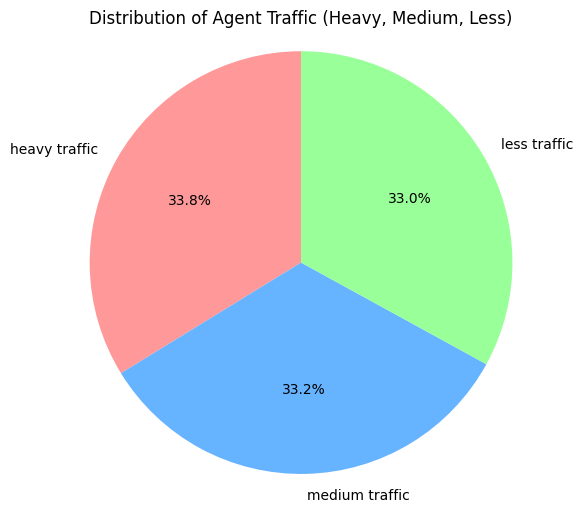

In [77]:
low_threshold = agent_traffic['total_calls'].quantile(0.33)
high_threshold = agent_traffic['total_calls'].quantile(0.66)


def label_traffic(calls):
    if calls <= low_threshold:
        return 'less traffic'
    elif calls <= high_threshold:
        return 'medium traffic'
    else:
        return 'heavy traffic'


agent_traffic['traffic_label'] = agent_traffic['total_calls'].apply(label_traffic)

traffic_distribution = agent_traffic['traffic_label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(traffic_distribution, labels=traffic_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Agent Traffic (Heavy, Medium, Less)')
plt.axis('equal')
plt.show()

    traffic_label  average_sentiment
0   heavy traffic          -0.033170
1    less traffic          -0.034048
2  medium traffic          -0.034119


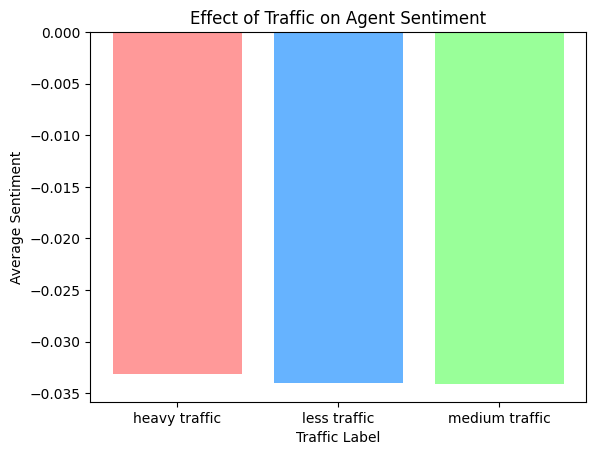

In [78]:
agent_sentiment_traffic = pd.merge(agent_traffic, sentiment_data, on='agent_id')


traffic_sentiment_analysis = agent_sentiment_traffic.groupby('traffic_label')['average_sentiment'].mean().reset_index()


print(traffic_sentiment_analysis)


import matplotlib.pyplot as plt

plt.bar(traffic_sentiment_analysis['traffic_label'], traffic_sentiment_analysis['average_sentiment'], color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Effect of Traffic on Agent Sentiment')
plt.xlabel('Traffic Label')
plt.ylabel('Average Sentiment')
plt.show()



customer_tone     angry      calm  frustrated   neutral    polite
agent_tone                                                       
angry         -0.597671 -0.643333   -0.619878 -0.588608 -0.638684
calm           0.105490  0.102319    0.103580  0.101852  0.103490
frustrated    -0.329048 -0.328354   -0.330572 -0.331664 -0.334115
neutral       -0.079366 -0.080231   -0.079682 -0.079203 -0.080177
polite         0.675556  0.738235    0.674375  0.617059  0.664737


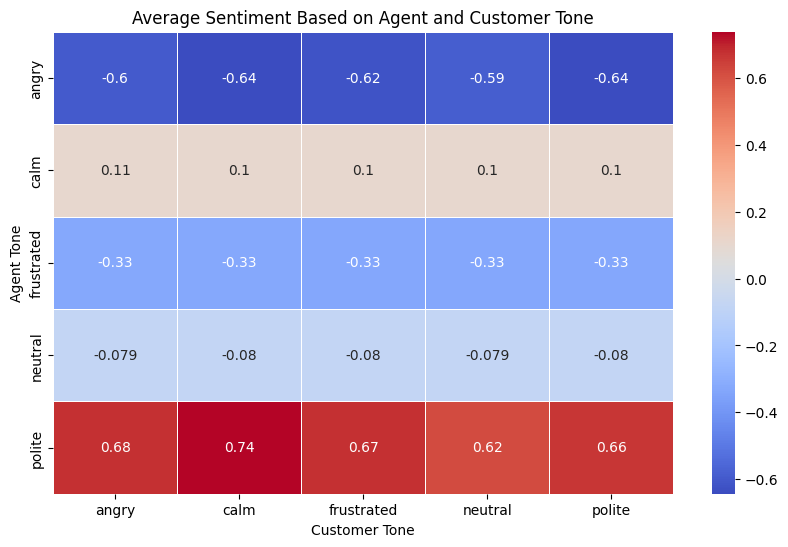

In [98]:
sentiment_analysis = df.groupby(['agent_tone', 'customer_tone'])['average_sentiment'].mean().unstack()

# Display the analysis of average sentiment based on agent and customer tone combinations
print(sentiment_analysis)

# Visualize with a heatmap to show how agent tones (calm, polite) affect customer sentiment
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_analysis, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Average Sentiment Based on Agent and Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.show()

   elite_level_code  Speed_To_Answer
0               0.0         7.292654
1               1.0         7.262508
2               2.0         7.185425
3               3.0         7.133132
4               4.0         6.851603
5               5.0         6.898621


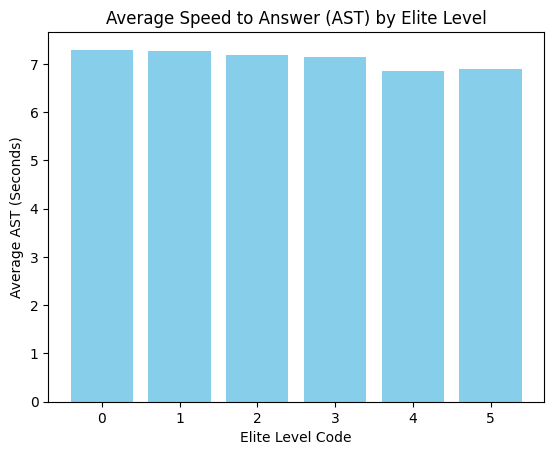

In [103]:
ast_by_elite_level = df.groupby('elite_level_code')['Speed_To_Answer'].mean().reset_index()

# Display the result
print(ast_by_elite_level)

# Visualization: Average AST by elite level
plt.bar(ast_by_elite_level['elite_level_code'], ast_by_elite_level['Speed_To_Answer'], color='skyblue')
plt.title('Average Speed to Answer (AST) by Elite Level')
plt.xlabel('Elite Level Code')
plt.ylabel('Average AST (Seconds)')
plt.show()


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the transcript data (convert words into numerical features)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_transcript'].fillna(''))

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)


top_words = df_tfidf.sum().sort_values(ascending=False).head(50)
print(top_words)

flight          12809.178112
change           7047.839458
let              6295.211595
help             4156.473291
like             4023.754403
thank            3801.412939
fee              3670.060934
united           3516.638373
typing           3404.713747
calling          3330.876639
work             3323.180206
okay             3292.033515
need             3241.238973
time             3232.299982
day              3086.585448
yeah             2938.412041
chicago          2905.272783
really           2847.947861
know             2752.399391
thanks           2749.131280
new              2735.286055
reservation      2689.124830
travel           2625.343212
earlier          2566.742748
make             2556.036000
booked           2553.338303
date             2528.089467
looks            2493.125501
today            2485.643093
look             2374.009094
la               2356.954238
check            2296.561425
confirmation     2275.234232
good             2267.121175
delay         

In [46]:
self_solvable_keywords = {
    'cancellation': ['cancel flight', 'cancellation', 'stop flight', 'end flight'],
    'reschedule': ['reschedule flight', 'change time', 'shift flight'],
    'flight_status': ['flight status', 'status check', 'update flight'],
    'seat_change': ['change seat', 'modify seat', 'switch seat']
}

# Function to label transcripts as 'self-solvable' or 'agent-needed'
def label_transcript(transcript, keywords_dict):
    # Initialize a flag for whether the issue is self-solvable
    is_self_solvable = False

    # Check for the presence of any self-solvable keywords in the transcript
    for issue, keywords in keywords_dict.items():
        for keyword in keywords:
            if keyword in transcript.lower():  # Case insensitive matching
                is_self_solvable = True
                break  # Exit the loop once a keyword is found

    # Return the label based on the presence of self-solvable keywords
    return 'self-solvable' if is_self_solvable else 'agent-needed'

# Assuming df_cleaned contains the call transcripts
df['issue_category'] = df['cleaned_transcript'].apply(lambda x: label_transcript(x, self_solvable_keywords))

# Display the first few rows with the new labels
print(df[['cleaned_transcript', 'issue_category']].head())


                                  cleaned_transcript issue_category
0  thank calling united airlines name jane may he...   agent-needed
1  thank calling united airlines name mark may he...  self-solvable
2  thank calling united airlines name steven may ...   agent-needed
3  thank calling united airlines name amy may hel...   agent-needed
4  thank calling united airlines  service john sp...   agent-needed


issue_category
agent-needed     46627
self-solvable    20009
Name: count, dtype: int64


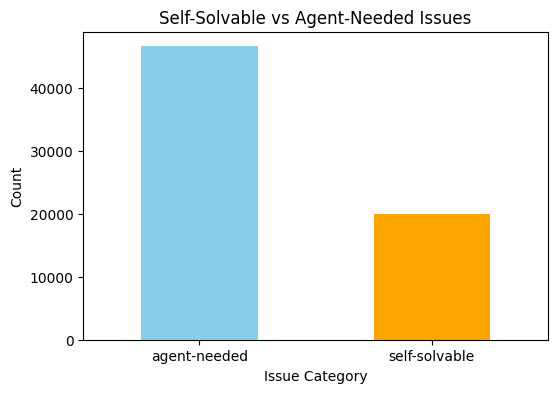

In [105]:
issue_counts = df['issue_category'].value_counts()

# Display the counts
print(issue_counts)

# Plot the counts using a bar chart
plt.figure(figsize=(6, 4))
issue_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Self-Solvable vs Agent-Needed Issues')
plt.xlabel('Issue Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


y = df['issue_category']  # self-solvable (0) or agent-needed (1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 agent-needed       0.89      0.97      0.93      9372
self-solvable       0.91      0.73      0.81      3956

     accuracy                           0.90     13328
    macro avg       0.90      0.85      0.87     13328
 weighted avg       0.90      0.90      0.89     13328



In [86]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['cleaned_transcript'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32255 unique tokens.


In [87]:
X = tokenizer.texts_to_sequences(df['cleaned_transcript'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (66636, 250)


In [88]:
Y = pd.get_dummies(df['primary_call_reason']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (66636, 21)


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(59972, 250) (59972, 21)
(6664, 250) (6664, 21)


In [95]:
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(54, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [101]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the classes for the test set
y_pred = model.predict(X_test, batch_size=batch_size)

# Convert predicted probabilities to class labels
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = Y_test.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


,call_id,primary_call_reason,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_duration,cleaned_transcript,Handling_Time,Speed_To_Answer,issue_category,word_count
0,131642,seating,103262588,132311,2024-08-04 17:46:00,2024-08-04 17:55:00,2024-08-04 17:59:00,\n\nAgent: Thank you for calling United Airlin...,Michael Petersen,0.0,neutral,polite,-0.07,0.03,13.0,thank calling united airlines name jane may he...,4.0,9.0,agent-needed,607
1,325527,irrops,8994245383,607742,2024-08-18 07:41:00,2024-08-18 07:45:00,2024-08-18 07:50:00,\n\nAgent: Thank you for calling United Airlin...,Andrew Hess,NaN,neutral,angry,-0.19,0.05,9.0,thank calling united airlines name mark may he...,5.0,4.0,self-solvable,634
2,526871,voluntarychange,5769982111,748700,2024-08-10 11:59:00,2024-08-10 12:08:00,2024-08-10 12:15:00,\n\nAgent: Thank you for calling United Airlin...,Joseph Thomas,3.0,neutral,frustrated,-0.22,0.13,16.0,thank calling united airlines name steven may ...,7.0,9.0,agent-needed,698
3,634548,seating,9534089270,542034,2024-08-11 11:15:00,2024-08-11 11:25:00,2024-08-11 11:39:00,\n\nAgent: Thank you for calling United Airlin...,Victoria Green,0.0,neutral,polite,-0.11,0.24,24.0,thank calling united airlines name amy may hel...,14.0,10.0,agent-needed,458
4,693921,voluntarychange,3046806067,633922,2024-08-06 15:58:00,2024-08-06 16:09:00,2024-08-06 16:15:00,\n\nAgent: Thank you for calling United Airlin...,Vickie Lopez,1.0,neutral,frustrated,-0.02,0.14,17.0,thank calling united airlines service john sp...,6.0,11.0,agent-needed,609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71804,9999336076,travelerupdates,3020619605,309976,2024-08-19 21:04:00,2024-08-19 21:16:00,2024-08-19 21:26:00,\n\nAgent: Thank you for calling United Airlin...,Jared Schultz,1.0,calm,calm,0.03,0.49,22.0,thank calling united airlines steve help hi s...,10.0,12.0,agent-needed,438
71805,9999337789,NaN,915905859,418648,2024-08-21 23:08:00,2024-08-21 23:17:00,2024-08-21 23:24:00,\n\nAgent: Thank you for calling United Airlin...,Jose Black,NaN,neutral,neutral,-0.05,0.15,16.0,thank calling united airlines service name ry...,7.0,9.0,agent-needed,369
71806,9999524523,irrops,3888680689,901589,2024-08-20 17:30:00,2024-08-20 17:36:00,2024-08-20 17:39:00,\n\nAgent: Thank you for calling United Airlin...,Angela Johnson,1.0,neutral,calm,-0.05,0.21,9.0,thank calling united airlines service name al...,3.0,6.0,agent-needed,304
71807,9999623753,irrops,4101455140,835105,2024-08-03 14:07:00,2024-08-03 14:11:00,2024-08-03 14:28:00,\n\nAgent: Thank you for calling United Airlin...,Michael Reed,NaN,neutral,neutral,-0.17,0.40,21.0,thank calling united airlines name rob may hel...,17.0,4.0,self-solvable,596
